In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 

In [2]:
!gdown --id 1H-uni6SujnkiJQExXGtrYuYhjck8BJee
!gdown --id 1700d587SL2HoV7GG-YtWQLRTg7fkBGn-

Downloading...
From: https://drive.google.com/uc?id=1H-uni6SujnkiJQExXGtrYuYhjck8BJee
To: /content/Market_cap.csv
100% 95.1k/95.1k [00:00<00:00, 28.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1700d587SL2HoV7GG-YtWQLRTg7fkBGn-
To: /content/CM_52_wk_High_low.csv
100% 38.5k/38.5k [00:00<00:00, 32.1MB/s]


##1)***Preprocessing and Cleaning*** for Market Cap Data

In [3]:
df=pd.read_csv('/content/Market_cap.csv')

In [4]:
dfx=df.drop(labels=[1921,1920], axis=0)
dfnew=dfx.drop('Sr. No.', axis=1)

In [5]:
df1=dfnew.rename(columns={'Market capitalization \n(Rs in Lakhs)':'MarketCap'})

In [6]:
df1

,Symbol,Company Name,MarketCap
0,RELIANCE,Reliance Industries Limited,126985361
1,TCS,Tata Consultancy Services Limited,117550304
2,HDFCBANK,HDFC Bank Limited,82341586
3,INFY,Infosys Limited,58277398
4,HINDUNILVR,Hindustan Unilever Limited,57129664
...,...,...,...
1915,CKPLEISURE,CKP Leisure Limited,"* Not Traded as on March 31, 2021"
1916,CKPPRODUCT,CKP Products Limited,"* Not Traded as on March 31, 2021"
1917,FOURTHDIM,Fourth Dimension Solutions Limited,"* Not Traded as on March 31, 2021"
1918,ARTEDZ,Artedz Fabs Limited,"* Not Traded as on March 31, 2021"


In [7]:
df1=df1[df1.MarketCap.apply(lambda x: x.isnumeric())]
df1.MarketCap=pd.to_numeric(df1.MarketCap)

In [8]:
df1.dtypes

Symbol          object
Company Name    object
MarketCap        int64
dtype: object

In [9]:
df1.isnull().sum()

Symbol          0
Company Name    0
MarketCap       0
dtype: int64

In [10]:
df_mcap_plot=df1.sort_values(by=['MarketCap'], ascending=False, ignore_index=True)
df_mcap_plot=df_mcap_plot.iloc[:10:, ::]

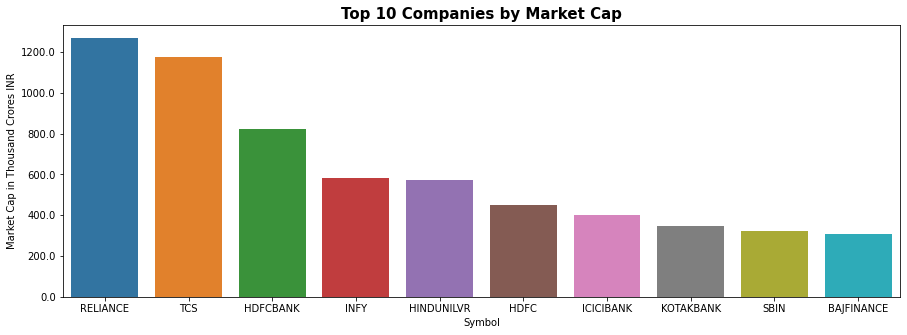

In [11]:
fig=plt.figure(figsize=(15, 5))
p=sns.barplot(df_mcap_plot['Symbol'], df_mcap_plot.MarketCap);
p.set_ylabel('Market Cap in Thousand Crores INR')
ylabels = [y  for y in p.get_yticks()/100000]
plt.title('Top 10 Companies by Market Cap', weight='bold', fontsize=15)
p.set_yticklabels(ylabels);  #plotting market cap of 10 largest companies 

In [12]:
list_comp_it=['LTI', 'MASTEK', 'INFY', 'KPITTECH', 'BHARTIARTL', 'INDUSTOWER', 'TATACOMM', 'COFORGE' ]

In [13]:
dfn=df1[df1.Symbol.isin(list_comp_it)]

In [14]:
dfn=dfn.reset_index(drop=True)


In [15]:
dfn=dfn.sort_values(by=['Symbol'])

In [16]:
dfn

,Symbol,Company Name,MarketCap
1,BHARTIARTL,Bharti Airtel Limited,28410257
5,COFORGE,Coforge Limited,1773365
3,INDUSTOWER,Indus Towers Limited,6602596
0,INFY,Infosys Limited,58277398
6,KPITTECH,KPIT Technologies Limited,486742
2,LTI,Larsen & Toubro Infotech Limited,7082721
7,MASTEK,Mastek Limited,307753
4,TATACOMM,Tata Communications Limited,3028980


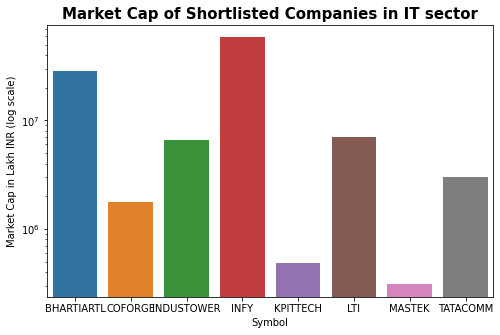

In [17]:
fig=plt.figure(figsize=(8, 5))
p=sns.barplot(dfn['Symbol'], dfn.MarketCap)
plt.yscale('log')
plt.title('Market Cap of Shortlisted Companies in IT sector', weight='bold', fontsize=15)
p.set_ylabel('Market Cap in Lakh INR (log scale)'); #plotting stocks by market cap in log scale

In [18]:
dfn_transform=dfn

###1)a)***Taking Squared log transform*** of the market cap to be used as a determining parameter

In [19]:
dfn_transform.MarketCap=np.square(np.log(dfn_transform.MarketCap))

In [20]:
dfn_transform

,Symbol,Company Name,MarketCap
1,BHARTIARTL,Bharti Airtel Limited,294.543196
5,COFORGE,Coforge Limited,207.025750
3,INDUSTOWER,Indus Towers Limited,246.583376
0,INFY,Infosys Limited,319.720323
6,KPITTECH,KPIT Technologies Limited,171.491845
2,LTI,Larsen & Toubro Infotech Limited,248.792851
7,MASTEK,Mastek Limited,159.695103
4,TATACOMM,Tata Communications Limited,222.717911


In [21]:
dfn_transform['MarketCapNorm']=dfn_transform.MarketCap/np.sum(dfn_transform.MarketCap)

In [22]:
dfn_transform    #transformed market cap to be used in the model

,Symbol,Company Name,MarketCap,MarketCapNorm
1,BHARTIARTL,Bharti Airtel Limited,294.543196,0.157462
5,COFORGE,Coforge Limited,207.025750,0.110675
3,INDUSTOWER,Indus Towers Limited,246.583376,0.131823
0,INFY,Infosys Limited,319.720323,0.170921
6,KPITTECH,KPIT Technologies Limited,171.491845,0.091679
2,LTI,Larsen & Toubro Infotech Limited,248.792851,0.133004
7,MASTEK,Mastek Limited,159.695103,0.085372
4,TATACOMM,Tata Communications Limited,222.717911,0.119064


##2)***Preprocessing and Cleaning*** for 52wk data 

In [23]:
df_wk=pd.read_csv('/content/CM_52_wk_High_low.csv')

In [24]:
df_wk=df_wk[df_wk.SYMBOL.isin(list_comp_it)]

In [25]:
df_wk=df_wk.sort_values(by=['SYMBOL'])

In [26]:
df_wk=df_wk.reset_index(drop=True)

In [27]:
df_wk.dtypes

SYMBOL                   object
Adjusted 52_Week_High    object
Adjusted 52_Week_Low     object
dtype: object

In [28]:
df_wk.isnull().sum()

SYMBOL                   0
Adjusted 52_Week_High    0
Adjusted 52_Week_Low     0
dtype: int64

In [29]:
df_wk['Adjusted 52_Week_High']=pd.to_numeric(df_wk['Adjusted 52_Week_High'])
df_wk['Adjusted 52_Week_Low']=pd.to_numeric(df_wk['Adjusted 52_Week_Low'])
df_wk.dtypes

SYMBOL                    object
Adjusted 52_Week_High    float64
Adjusted 52_Week_Low     float64
dtype: object

In [30]:
df_wk['Margin']=(df_wk['Adjusted 52_Week_High'] - df_wk['Adjusted 52_Week_Low'])

In [31]:
df_wk['Margin(frac)']=2*(df_wk['Adjusted 52_Week_High']-df_wk['Adjusted 52_Week_Low'])/(df_wk['Adjusted 52_Week_High']+df_wk['Adjusted 52_Week_Low'])

In [32]:
df_wk_new=df_wk
df_wk_new['Normalised Margin']=df_wk_new['Margin(frac)']/np.sum(df_wk_new['Margin(frac)'])
df_wk_new

,SYMBOL,Adjusted 52_Week_High,Adjusted 52_Week_Low,Margin,Margin(frac),Normalised Margin
0,BHARTIARTL,781.80,475.40,306.40,0.487432,0.076800
1,COFORGE,6030.00,2300.00,3730.00,0.895558,0.141104
2,INDUSTOWER,332.80,194.10,138.70,0.526476,0.082952
3,INFY,1848.00,1148.20,699.80,0.467125,0.073600
4,KPITTECH,531.00,104.35,426.65,1.343039,0.211609
5,LTI,7564.95,3211.10,4353.85,0.808060,0.127318
6,MASTEK,3669.00,802.20,2866.80,1.282340,0.202046
7,TATACOMM,1540.00,888.30,651.70,0.536754,0.084571


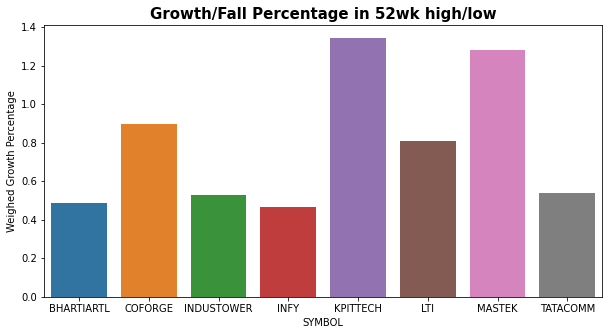

In [33]:
fig=plt.figure(figsize=(10, 5))
p=sns.barplot(df_wk_new['SYMBOL'], df_wk_new['Margin(frac)'])
plt.title('Growth/Fall Percentage in 52wk high/low', weight='bold', fontsize=15)
p.set_ylabel('Weighed Growth Percentage'); #plotting the growth ratio of stocks from 52wk high and low

#3)***Finalising Investment Fund Distribution***

We will be using the Asymptomatically Normalised Exponential weighing function for adding the contribution from 52wk markup.

##\begin{align}{2(\frac{e^x}{1+e^x} - 0.5)}\end{align}
The graph of the weighing function is given below.

In [34]:
df_wk_new['Weighed']=2*(np.exp(df_wk_new['Margin(frac)'])/(1+np.exp(df_wk_new['Margin(frac)']))-0.5)

In [35]:
df_wk_new['WeighedNorm']=df_wk_new.Weighed/np.sum(df_wk_new.Weighed)

In [36]:
df_wk_new

,SYMBOL,Adjusted 52_Week_High,Adjusted 52_Week_Low,Margin,Margin(frac),Normalised Margin,Weighed,WeighedNorm
0,BHARTIARTL,781.80,475.40,306.40,0.487432,0.076800,0.239003,0.081211
1,COFORGE,6030.00,2300.00,3730.00,0.895558,0.141104,0.420072,0.142737
2,INDUSTOWER,332.80,194.10,138.70,0.526476,0.082952,0.257321,0.087436
3,INFY,1848.00,1148.20,699.80,0.467125,0.073600,0.229406,0.077950
4,KPITTECH,531.00,104.35,426.65,1.343039,0.211609,0.585979,0.199110
5,LTI,7564.95,3211.10,4353.85,0.808060,0.127318,0.383392,0.130273
6,MASTEK,3669.00,802.20,2866.80,1.282340,0.202046,0.565696,0.192219
7,TATACOMM,1540.00,888.30,651.70,0.536754,0.084571,0.262114,0.089064


In [37]:
x=np.linspace(-5, 5, 1000)

In [38]:
y=2*(np.exp(x)/(1+np.exp(x))-0.5)

###***Generating a Weighing Function***

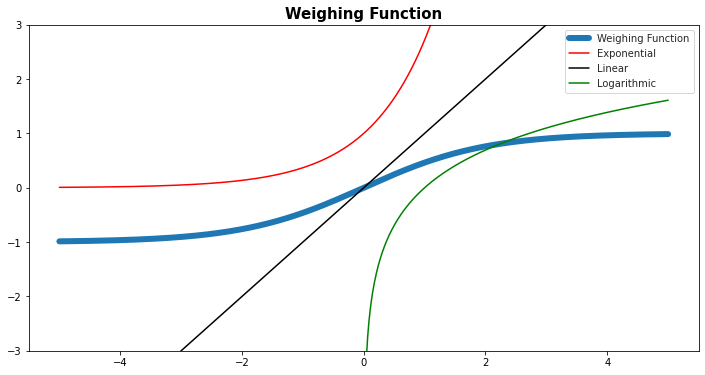

In [39]:
fig, ax=plt.subplots(figsize=(12,6))
sns.set_style('whitegrid')
ax.plot(x, y, linewidth='6', label='Weighing Function')
ax.plot(x, np.exp(x), color='red', label='Exponential')
ax.plot(x,x, color='black', label='Linear')
ax.plot(x, np.log(x), color='green', label='Logarithmic')
plt.title('Weighing Function', weight='bold', fontsize=15)
ax.legend(frameon=True)
plt.ylim(-3, 3); #plotting the weighing function alongwith standard functions

We now create 5 different models to accomodate the risk appetite, investment timeline, and risk to reward ratio that the investor is targeting.<br>
We have created the model using the normalised values of log-Squared Market cap and Normalised values of Weighed and Normalised 52wk low-high gain ratio
<br><br>
The Parameter controlling the model behaviour is Lambda($\lambda$)
<br>
The formula for the distribution of funds is ->
<br>
(normalised market cap) + $\lambda$(weighed-normalised 52wk markup)
<br><br>
##\begin{align}{(Norm\;Market\;CaP) + \lambda(Norm\;Weighed\;Markup)}\end{align}


Smaller value of $\lambda$ gives more weightage to market capitalisation of a stock, which is in general, considered to be a ***safe investment*** in large market cap companies.<br>
On the other hand, larger value of $\lambda$ gives lesser weightage to the market cap, and more importance to the difference between ***CMP*** and ***52wk High***. 

In [40]:
scorecard=pd.DataFrame(columns=list_comp_it)

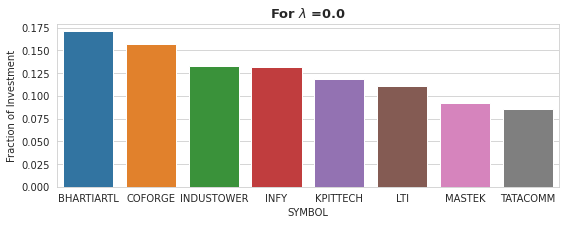

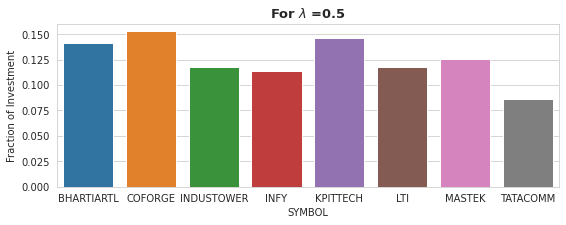

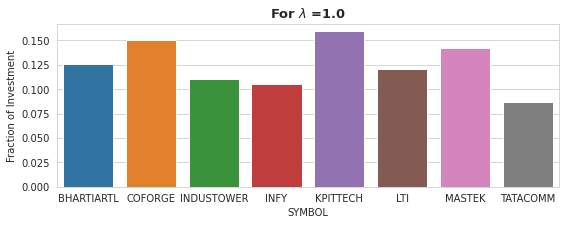

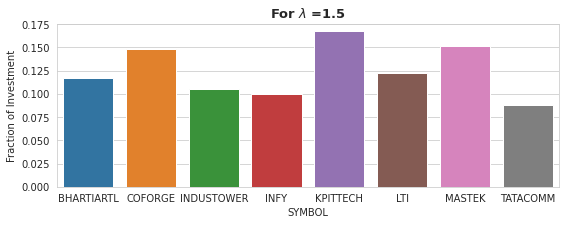

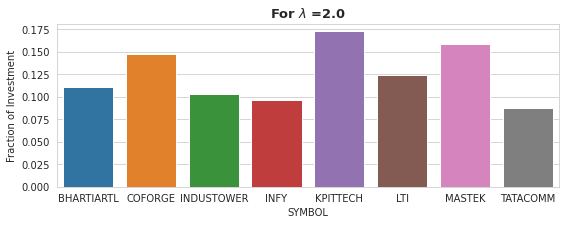

In [41]:
for i in np.linspace(0, 2, 5):
  fig=plt.figure(figsize=(9, 3))
  final=dfn_transform['MarketCapNorm'] + i*df_wk_new.WeighedNorm
  final=final/np.sum(final)
  plt.ylabel('Fraction of Investment')
  sns.barplot(df_wk_new.SYMBOL, final)
  plt.title(f'For $\lambda$ ={i}', weight='bold', fontsize=13)
  final_series=pd.Series(final.tolist(), index=scorecard.columns)
  scorecard=scorecard.append(final_series, ignore_index=True)




In [42]:
scorecard

,LTI,MASTEK,INFY,KPITTECH,BHARTIARTL,INDUSTOWER,TATACOMM,COFORGE
0,0.170921,0.157462,0.133004,0.131823,0.119064,0.110675,0.091679,0.085372
1,0.141018,0.152553,0.117814,0.113865,0.145746,0.117208,0.125192,0.086603
2,0.126066,0.150099,0.110220,0.104886,0.159087,0.120474,0.141949,0.087218
3,0.117095,0.148627,0.105663,0.099499,0.167092,0.122434,0.152003,0.087587
4,0.111114,0.147645,0.102625,0.095908,0.172428,0.123741,0.158705,0.087834


In [43]:
scorecard['Lambda']=np.linspace(0,2,5)

In [44]:
scorecard

,LTI,MASTEK,INFY,KPITTECH,BHARTIARTL,INDUSTOWER,TATACOMM,COFORGE,Lambda
0,0.170921,0.157462,0.133004,0.131823,0.119064,0.110675,0.091679,0.085372,0.0
1,0.141018,0.152553,0.117814,0.113865,0.145746,0.117208,0.125192,0.086603,0.5
2,0.126066,0.150099,0.110220,0.104886,0.159087,0.120474,0.141949,0.087218,1.0
3,0.117095,0.148627,0.105663,0.099499,0.167092,0.122434,0.152003,0.087587,1.5
4,0.111114,0.147645,0.102625,0.095908,0.172428,0.123741,0.158705,0.087834,2.0


The above scorecard depicts the relative fraction of investments that should be done in different stocks as per the risk appetite of the investor. 